# Importing Required Liabraries

In [98]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from ipywidgets import interact


In [99]:
df = pd.read_csv("googleplaystore.csv")

#Let's check top 5records present in dataset

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [100]:
#let's check columns present in dataset

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [59]:
# Structural information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [101]:
#statistical information of data

df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [102]:
#Checking for null values

In [103]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [104]:
# Removing unwanted columns from dataset

df.drop(["Rating","Size","Installs","Content Rating","Last Updated","Current Ver","Android Ver"],axis=1,inplace=True)

In [105]:
df.drop(["Reviews","Type"],axis=1,inplace=True)

In [106]:
df.drop(["Price"],axis=1,inplace=True)

In [107]:
#Let's check final dataset
df.head()

,App,Category,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Art & Design
1,Coloring book moana,ART_AND_DESIGN,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Art & Design;Creativity


In [108]:
# No null/missing values are present in final dataset
df.isnull().sum()

App         0
Category    0
Genres      0
dtype: int64

# Function to view Apps According Category

In [109]:
#Let's Make the interactive function to distinguish apps according to category
@interact
def cat(category=list(df["Category"].value_counts().index)):
    x =df[df["Category"]==category]
    #finding top 5 app names according to category
    print(x.head())
    

interactive(children=(Dropdown(description='category', options=('FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINES…

In [110]:
cat_df = df.select_dtypes("object")
cat_df

,App,Category,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Art & Design
1,Coloring book moana,ART_AND_DESIGN,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Art & Design;Creativity
...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Education
10838,Parkinson Exercices FR,MEDICAL,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Books & Reference


In [111]:
#Let's Perform Encoding to convert object datatype to numeric

In [112]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cat_df:
    le = LabelEncoder()
    cat_df[i] = le.fit_transform(cat_df[i])

In [113]:
x = cat_df

In [114]:
x

,App,Category,Genres
0,6963,1,9
1,2632,1,12
2,8657,1,9
3,7828,1,9
4,7023,1,11
...,...,...,...
10836,8174,12,39
10837,4609,12,39
10838,6892,21,72
10839,8395,4,19


# Model Building

In [115]:
from sklearn.cluster import KMeans

x = pd.DataFrame(x)
x = x.values

print(x.shape)


(10841, 3)


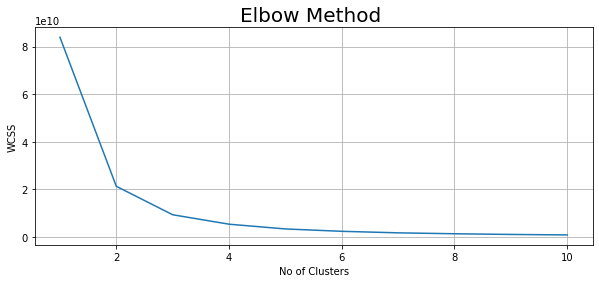

In [116]:
#Finding the optimal value of clusters using elbow method

plt.rcParams["figure.figsize"] = (10,4)

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=1)
    km.fit(x)
    wcss.append(km.inertia_)
    

# Let's plot the result
plt.plot(range(1,11),wcss)
plt.title("Elbow Method ",fontsize= 20)
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

# Final Model

In [117]:
km = KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=1)
ypred = km.fit_predict(x)
ypred

array([0, 2, 3, ..., 0, 3, 3])

In [118]:
centroids = km.cluster_centers_

df2 = pd.DataFrame(centroids,columns=["X","Y","Z"])
df2

,X,Y,Z
0,6022.758242,17.593407,64.283942
1,1220.874049,17.760274,64.202055
2,3625.608911,17.500762,65.408225
3,8464.920824,18.033623,65.614244


In [119]:
df3 = pd.concat([df,pd.DataFrame({"LABELS":ypred})],axis=1)
df3

,App,Category,Genres,LABELS
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Art & Design,0
1,Coloring book moana,ART_AND_DESIGN,Art & Design;Pretend Play,2
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Art & Design,3
3,Sketch - Draw & Paint,ART_AND_DESIGN,Art & Design,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Art & Design;Creativity,0
...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Education,3
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Education,2
10838,Parkinson Exercices FR,MEDICAL,Medical,0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Books & Reference,3


# Function to view the records according to cluster/group

In [120]:
# Let's Make The function that segregate the apps according the cluster/groups.
@interact
def result(groups = list(df3["LABELS"].value_counts().index)):
    x = df3[df3["LABELS"]==groups]
    
    
    print(x)

interactive(children=(Dropdown(description='groups', options=(0, 3, 1, 2), value=0), Output()), _dom_classes=(…

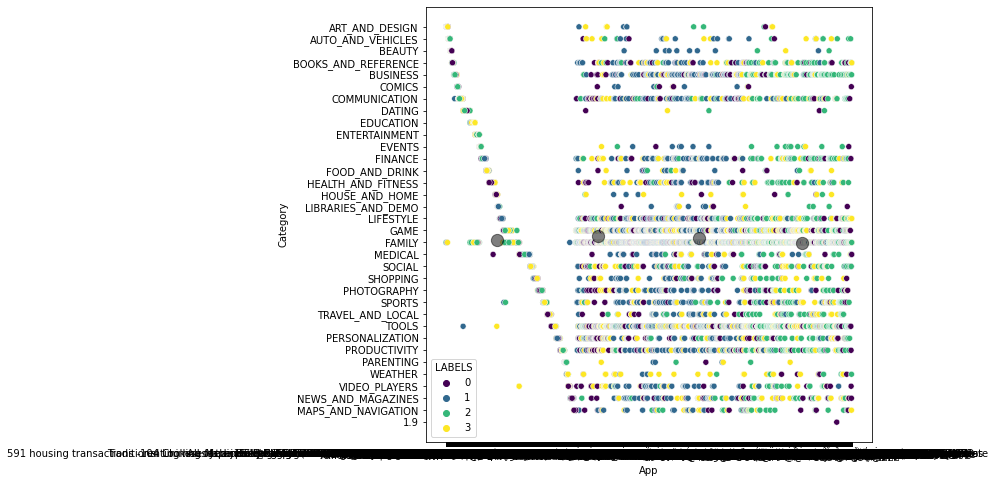

In [96]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df3["App"],y=df3["Category"],hue=df3["LABELS"],palette="viridis")
plt.scatter(df2["X"],df2["Y"],c="black",s=150,alpha=0.5)
